# Hypothesis Testing with Insurance Data

Craig Gossen

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

## Load and Clean

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Load and Clean
df = pd.read_csv('Data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Do smokers have higher insurance charges than non-smokers?

The metrics used to answer this question will be the individual's smoking status (yes/no) and their insurance charges. 

Null Hypothesis: The insurance charges are the same regardless of smoking status. 

Alternate Hypothesis: The insurance charges differ depending upon smoking class.

This is numerical data with 2 samples/groups to be compared. *A 2 sample t-test will be utilized.*

The following assumptions will need to be understood:
1. No significant outliers
    - Use absolute value of Z-scores >3 as rule
2. Normality
    - scipy.stats.normaltest
3. Equal Variance
    - scipy.stats.levene
    
Summary Table will utilize stats.ttest_ind()

The p-value will be checked vs. alpha
    - p-value > alpha = fail to reject hypothesis
    - p-value < alpha = reject the null hypothesis as there is a significant difference between groups


In [4]:
#Alpha set to 5%
alpha = 0.05

In [5]:
#Filtering out smokers
smokers = df.loc[df['smoker']=='yes'].copy()
nonsmokers = df.loc[df['smoker']=='no'].copy()

#smokercharge = smokers['charges']
#nonsmokercharge = nonsmokers['charges']

In [6]:
# calculate descriptive stats
smokers_mean = np.mean(smokers['charges'])
smokers_med = np.median(smokers['charges'])
smokers_std = np.std(smokers['charges'])

print(f'Smokers: \nMean = {smokers_mean:,.0f}\nMedian = {smokers_med:,.0f}\nStd Dev = {smokers_std:,.0f}')

Smokers: 
Mean = 32,050
Median = 34,456
Std Dev = 11,520


In [7]:
# calculate descriptive stats
nonsmokers_mean = np.mean(nonsmokers['charges'])
nonsmokers_med = np.median(nonsmokers['charges'])
nonsmokers_std = np.std(nonsmokers['charges'])

print(f'Non Smokers: \nMean = {nonsmokers_mean:,.0f}\nMedian = {nonsmokers_med:,.0f}\nStd Dev = {nonsmokers_std:,.0f}')

Non Smokers: 
Mean = 8,434
Median = 7,345
Std Dev = 5,991


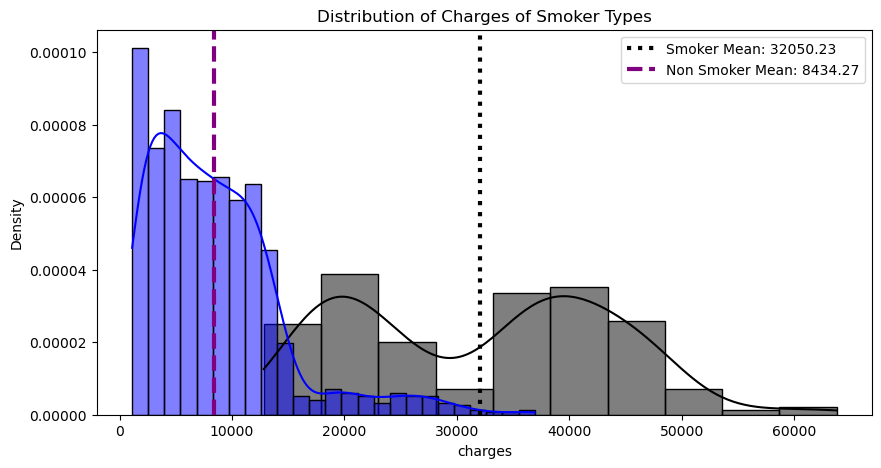

In [8]:
## Visualizing Sample means
fig, ax = plt.subplots(figsize= (10,5))

# Histogram
ax = sns.histplot(data=smokers, x='charges',fill=True, color='black',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax = sns.histplot(data=nonsmokers, x='charges',fill=True, color='blue',kde=True,
                  stat='density',common_norm=False,ax=ax)

#Annotations
ax.set_title('Distribution of Charges of Smoker Types')
ax.axvline(smokers_mean,ls=':', color='black', lw=3, label =f"Smoker Mean: {smokers_mean:.2f}")
ax.axvline(nonsmokers_mean,ls='--', color='purple', lw=3, label =f"Non Smoker Mean: {nonsmokers_mean:.2f}")
ax.legend()

There appears to be a significant difference between charges for smokers and non smokers. 

In [9]:
#Getting charges from dataset
smokerscharges = smokers['charges']

#Testing for outliers
zscores_s = stats.zscore(smokerscharges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [10]:
#Getting charges from dataset
nonsmokerscharges = nonsmokers['charges']

#Testing for outliers
zscores_ns = stats.zscore(nonsmokerscharges)
outliers_ns = abs(zscores_ns)>3
np.sum(outliers_ns)

24

In [11]:
#Remove outliers
nonsmokerscharges = nonsmokerscharges[(np.abs(stats.zscore(nonsmokerscharges)) < 3)]

In [12]:
#Normality Test
result_smokerscharges = stats.normaltest(smokerscharges)
result_smokerscharges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [13]:
#Normality Test
result_nonsmokerscharges = stats.normaltest(nonsmokerscharges)
result_nonsmokerscharges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

Both smokers and nonsmokers normality were well below alpha which means the data is not normally distributed. The sample size is large enough. 

In [14]:
#Check for variance
result = stats.levene(smokerscharges, nonsmokerscharges)

if result.pvalue< alpha:
    print(f'The p value is {result.pvalue:.5f} < {alpha} indicating no significant difference')
else:
    print(f'The p value is {result.pvalue:.5f} > {alpha} indicating there is a significant difference')

result


The p value is 0.00000 < 0.05 indicating no significant difference


LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

The p value < alpha, so **we reject the null hypothesis and accept there is a significant difference between the charges between smokers and nonsmokers.**

The above visual helps to show this conclusion. 

## Are men more likely to smoke than women?

The metrics used to answer this question will be the individual's sex (female/male) and their smoking status (yes/no). 

Null Hypothesis: A person's sex **does not** influence whether they will be a smoker or non smoker. 

Alternate Hypothesis: A person's sex **does** influence whether they will be a smoker or non smoker.

This is categorical data with 4 samples/groups to be compared. *A chi-square will be utilized.*

The following assumptions are made:
  - There are two categorical variables (ordinal or nominal) (sex & smoker - both categorical)
  - The outcomes are independent
  
Summary Table will utilize stats.chi2_contingency()

The p-value will be checked vs. alpha
    - p-value > alpha = fail to reject hypothesis
    - p-value < alpha = reject the null hypothesis as there is a significant difference between groups

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Number of Smokers/Non Smokers per Sex')

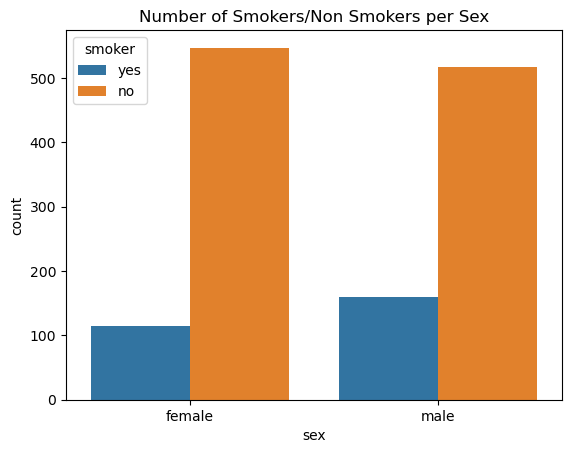

In [16]:
#Plot
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers/Non Smokers per Sex")


In [17]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [18]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
result


(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

In [19]:
#Label the results
chi2, p, deg_free, expected_vals = result

In [20]:
# What was our p-value?
print(f' chi2 = {chi2:.2f}: p = {p:.5f}: deg_free = {deg_free:.2f}: expected_vals = {expected_vals}')

p<alpha

 chi2 = 7.39: p = 0.00655: deg_free = 1.00: expected_vals = [[526.43348281 135.56651719]
 [537.56651719 138.43348281]]


True

The p value < alpha (0.05), so we reject the null hypothesis. **A person's sex does influence whether they will be a smoker or non smoker.**

The above visual helps to show this conclusion. 

## Do different regions have different charges, on average?

In [21]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

The metrics used to answer this question will be the individual's region (southeast/southwest/northwest/northeast) and their charge (numeric). 

Null Hypothesis: A person's region **does not** influence their charge. 

Alternate Hypothesis: A person's region **does** influence their charge.

This is categorical data with 8 samples/groups to be compared. *ANOVA and/or Tukey will be used.*

The following assumptions will be investigated:
- Normality
- Equal variance
- No significant outliers
  
Summary Table will utilize stats.f_oneway()

The p-value will be checked vs. alpha

    1. p-value > alpha = fail to reject hypothesis
    2. p-value < alpha = reject the null hypothesis as there is a significant difference between groups
    
Post-hoc multiple comparison tests (if needed)

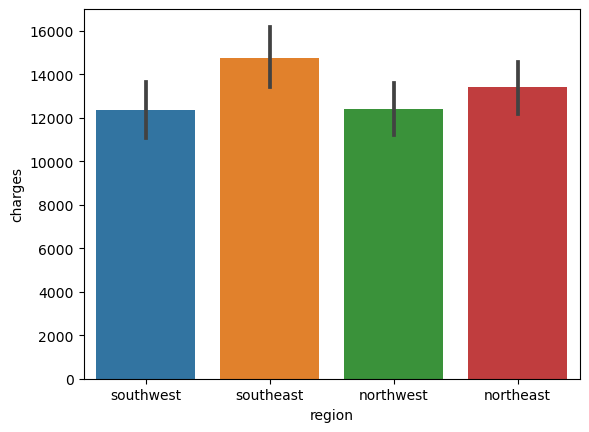

In [22]:
#Visualize
sns.barplot(data=df, x='region',y='charges');

In [23]:
#Separating the groups 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
    
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [26]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


N is > 15 for having 4 groups so we can move onto testing the assumption of equal variance. 

In [27]:
#Testing Variance
# with the * operator to select all groups
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

Since our p-value was >.05 we accept the null hypothesis that the samples come from regions with equal variances. Therefore, we accept that our groups do have equal variance, and we have met the assumption of homogeneity of variances.

In [28]:
#Check for outliers using z-score (could use Tukey's interquartile range)

zscores= stats.zscore(df['charges'])
outliers = abs(zscores)>3
np.sum(outliers)


7

In [31]:
#Remove outliers
no_outliers = df[(np.abs(stats.zscore(df['charges'])) < 3)]
no_outliers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
# perform the correct hypothesis test/ANOVA
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

The p value being < alpha indicates a significant difference. Tukey's will be used to differentiate which group were significantly different. 

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
values = df['charges']
labels = df['region']

In [34]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


There is a significant different between charges for southeast and southwest. 

**Hence, the test shows a significant difference and the null hypothesis can be rejected. Different regions have different charges.**

The above visual helps to show this conclusion. 